In [38]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Cargar datos
df = pd.read_csv("train.csv")

# Mostrar información general del dataset
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


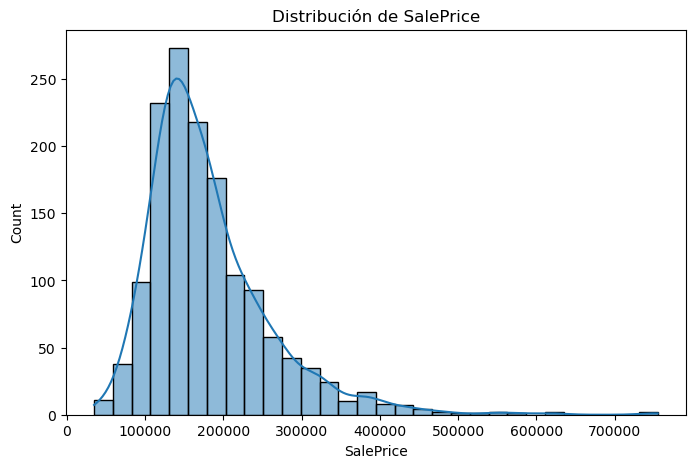

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt  

plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribución de SalePrice")
plt.show()

In [23]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [24]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df.fillna("None", inplace=True)

/tmp/ipykernel_3254/1865812122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
/tmp/ipykernel_3254/1865812122.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("None", inplace=True)


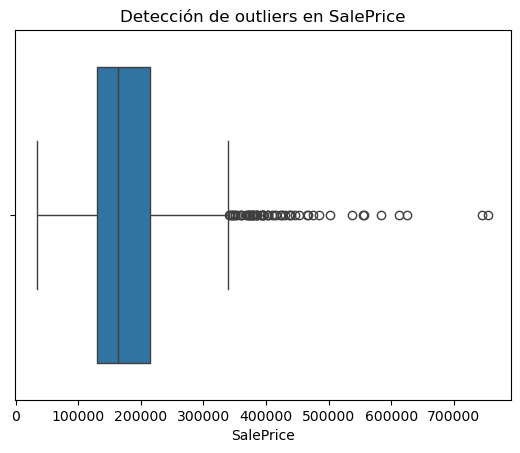

In [25]:
sns.boxplot(x=df["SalePrice"])
plt.title("Detección de outliers en SalePrice")
plt.show()

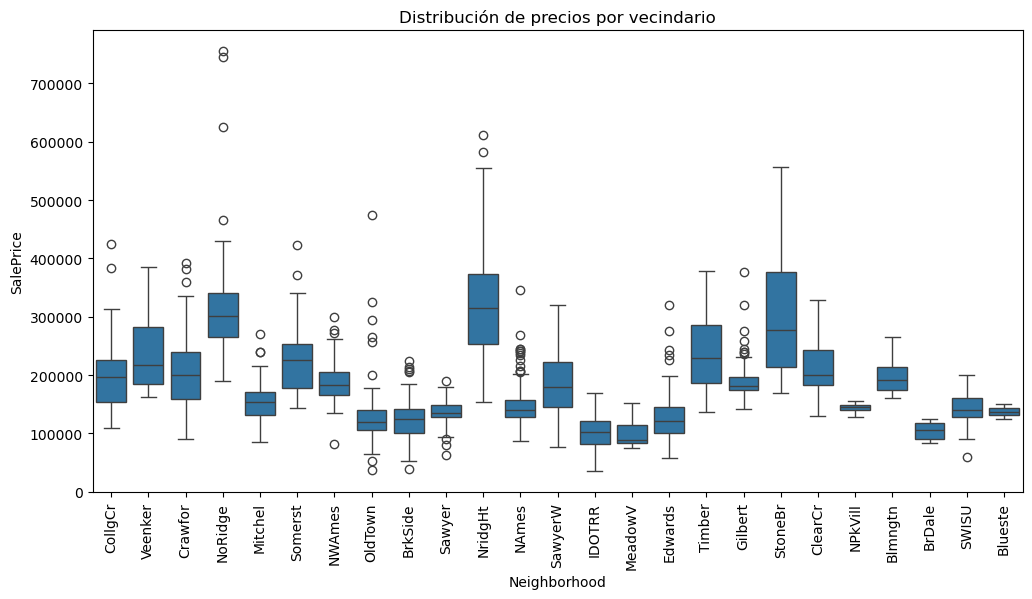

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de precios por vecindario")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split  

# Seleccionar variables numéricas
X = df.select_dtypes(include=['number']).drop(columns=['SalePrice'])
y = df['SalePrice']

# División del dataset (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

Entrenamiento: (1168, 35), Prueba: (292, 35)


In [28]:
important_features = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "YearBuilt"]
X_train = X_train[important_features]
X_test = X_test[important_features]

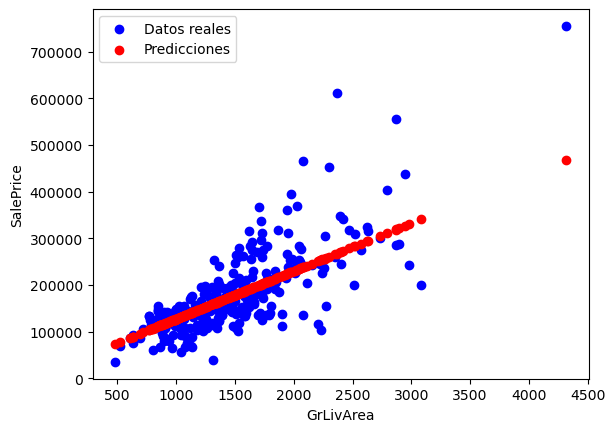

In [29]:
from sklearn.linear_model import LinearRegression  

X_simple = X_train[['GrLivArea']]
modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y_train)

# Predicciones
y_pred_simple = modelo_simple.predict(X_test[['GrLivArea']])

plt.scatter(X_test['GrLivArea'], y_test, color='blue', label="Datos reales")
plt.scatter(X_test['GrLivArea'], y_pred_simple, color='red', label="Predicciones")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

In [31]:
modelo_multiples = LinearRegression()
modelo_multiples.fit(X_train, y_train)

# Predicciones
y_pred_multiples = modelo_multiples.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score  

rmse = mean_squared_error(y_test, y_pred_multiples)
r2 = r2_score(y_test, y_pred_multiples)

print(f"RMSE: {rmse}, R²: {r2}")

RMSE: 1581119650.3936512, R²: 0.793865396635656


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

      Variable        VIF
0  OverallQual  44.202091
1    GrLivArea  15.316543
2  TotalBsmtSF  10.120858
3   GarageCars  10.993847
4    YearBuilt  22.889568


RMSE Ridge: 1581034882.0587368, R² Ridge: 0.7938764480997822


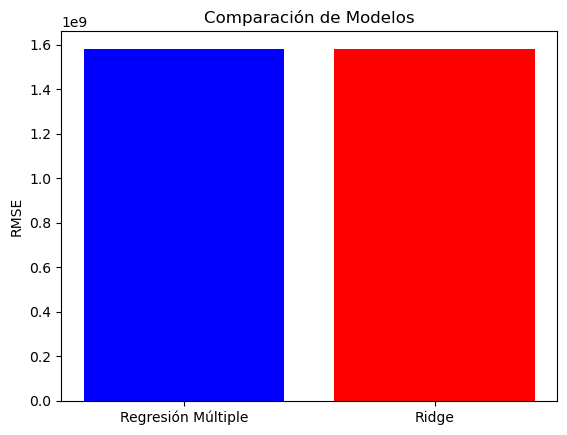

In [37]:
from sklearn.linear_model import Ridge  

modelo_ridge = Ridge(alpha=1)
modelo_ridge.fit(X_train, y_train)

y_pred_ridge = modelo_ridge.predict(X_test)

rmse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"RMSE Ridge: {rmse_ridge}, R² Ridge: {r2_ridge}")

plt.bar(["Regresión Múltiple", "Ridge"], [rmse, rmse_ridge], color=['blue', 'red'])
plt.ylabel("RMSE")
plt.title("Comparación de Modelos")
plt.show()